# BENG 212 HW 1

## Kinshuk Sahu

### 1/21/2020

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.decomposition import PCA, FastICA

Read in the data file as a pandas dataframe. The following line will only work if the provided 'Homework_Data.xlsx' file is in the same folder as this one.

In [2]:
data = pd.read_excel('Homework_Data.xlsx', sheet_name = 'Expression Data', index_col = 0)

data.head() #shows the top 5 rows

,base__wt_glc__1,base__wt_glc__2,fur__wt_dpd__1,fur__wt_dpd__2,fur__wt_fe__1,fur__wt_fe__2,fur__delfur_dpd__1,fur__delfur_dpd__2,fur__delfur_fe2__1,fur__delfur_fe2__2,...,rpoB__wt_lb__2,rpoB__rpoBE546V_031__1,rpoB__rpoBE546V_044__1,rpoB__rpoBE546V_lb__1,rpoB__rpoBE546V_lb__2,rpoB__rpoBE546V_glc__1,rpoB__rpoBE672K_glc__1,rpoB__rpoBE672K_glc__2,rpoB__rpoBE672K_lb__1,rpoB__rpoBE672K_lb__2
b0002,7.629317,7.714938,8.113347,8.240386,7.669640,7.471594,6.915225,7.133376,7.784013,7.773122,...,5.191566,7.061956,7.142701,5.668539,5.649356,7.574388,7.625299,7.624386,5.640107,5.652065
b0003,7.219668,7.294158,7.918491,8.181859,7.470134,7.345953,6.652128,7.064316,7.554007,7.528505,...,5.547168,6.749462,6.945277,5.620395,5.646778,7.134694,7.374954,7.374000,5.369193,5.318577
b0004,7.343891,7.434121,7.248520,7.471647,7.205343,7.010567,6.059338,6.295427,7.059941,7.045726,...,5.549536,6.873381,6.964728,5.568881,5.612399,7.102728,7.538778,7.542841,5.402317,5.422052
b0005,4.378073,4.338134,3.758424,3.698816,4.655322,4.443782,3.207263,3.296815,4.524755,4.253390,...,1.390360,4.178768,4.312080,2.281869,3.053053,5.234553,4.862053,4.865263,2.510686,2.927543
b0006,4.793733,4.781124,4.696611,4.701444,4.687029,4.724970,4.635023,4.755118,4.756608,4.725641,...,4.579556,4.823312,4.943441,4.859915,4.794207,4.770893,4.823452,4.901313,4.785283,4.710034


In [3]:
metadata = pd.read_excel('Homework_Data.xlsx', sheet_name = 'Experimental Conditions', index_col = 0)

metadata.head()

,Study,Condition ID,Replicate #,Strain Description,Base Media,Carbon Source (g/L),Nitrogen Source (g/L),Electron Acceptor,Trace Element Mixture,Supplement,Temperature (C),pH,Culture Type,Growth Rate (1/hr),Sequencing Machine,Additional Details,Biological Replicates,DOI,GEO
Sample ID,,,,,,,,,,,,,,,,,,,
base__wt_glc__1,Base,wt_glc,1,Escherichia coli K-12 MG1655,M9,glucose(2),NH4Cl(1),O2,sauer trace element mixture,NaN,37,7.0,Batch,NaN,MiSeq,NaN,2,doi.org/10.1101/080929,GSE65643
base__wt_glc__2,Base,wt_glc,2,Escherichia coli K-12 MG1655,M9,glucose(2),NH4Cl(1),O2,sauer trace element mixture,NaN,37,7.0,Batch,NaN,MiSeq,NaN,2,doi.org/10.1101/080929,GSE65643
fur__wt_dpd__1,Fur,wt_dpd,1,Escherichia coli K-12 MG1655,M9,glucose(2),NH4Cl(1),O2,NaN,DPD(0.2mM),37,7.0,Batch,0.000000,MiSeq,NaN,2,doi.org/10.1038/ncomms5910,GSE54900
fur__wt_dpd__2,Fur,wt_dpd,2,Escherichia coli K-12 MG1655,M9,glucose(2),NH4Cl(1),O2,NaN,DPD(0.2mM),37,7.0,Batch,0.000000,MiSeq,NaN,2,doi.org/10.1038/ncomms5910,GSE54900
fur__wt_fe__1,Fur,wt_fe,1,Escherichia coli K-12 MG1655,M9,glucose(2),NH4Cl(1),O2,NaN,FeCl2(0.1mM),37,7.0,Batch,1.060606,MiSeq,NaN,2,doi.org/10.1038/ncomms5910,GSE54900


In [8]:
gene_info = pd.read_excel('Homework_Data.xlsx', sheet_name = 'Gene Information', index_col = 0)
gene_info.head()

,start,stop,strand,gene_name,length,operon,cog
b0002,336,2799,+,thrA,2463,thrLABC,No COG Annotation
b0003,2800,3733,+,thrB,933,thrLABC,Amino acid transport and metabolism
b0004,3733,5020,+,thrC,1287,thrLABC,Amino acid transport and metabolism
b0005,5233,5530,+,yaaX,297,yaaX,Function unknown
b0006,5682,6459,-,yaaA,777,yaaA,Function unknown


In [4]:
np_matrix = data.values
pd_df = pd.DataFrame(np_matrix, index = data.index, columns = data.columns)

In [5]:
data_norm = pd.DataFrame(stats.zscore(data, axis = 1), index = data.index, columns = data.columns)
print((data_norm))

         base__wt_glc__1  base__wt_glc__2  fur__wt_dpd__1  fur__wt_dpd__2  \
b0002           0.652103         0.753528        1.225472        1.375960   
b0003           0.478924         0.580058        1.427710        1.785282   
b0004           0.902600         1.027067        0.771041        1.078832   
b0005           1.048990         0.994189        0.198769        0.116981   
b0006           0.262497         0.197917       -0.234927       -0.210173   
...                  ...              ...             ...             ...   
b4688           0.569038         0.585560       -0.521282       -0.504493   
b4693          -1.764897        -1.032538        0.388638       -0.059113   
b4696_1        -0.538527        -0.693644        1.174164        0.985308   
b4696_2        -0.296454        -0.183558        1.161298        1.332168   
b4705           1.444584         0.844088       -0.658890       -0.645351   

         fur__wt_fe__1  fur__wt_fe__2  fur__delfur_dpd__1  fur__delfur_dpd_

## Problem 1: SVD and PCA

### a. Read “A tutorial on Principal Component Analysis” by Jonathon Shlens: https://arxiv.org/abs/1404.1100. Summarize the PCA workflow, its practical uses, and weaknesses of the method.

For a given data matrix X of dimensions n x m 
First normalize the data so that it has a zero mean and unit variance. 
Next calculate the covariance matrix Cx which is given by 1/n* X* X^T  
Find the eigen values and the eigen vector of the covariance matrix, (eigen vector denoted by P)
Sort the principal components in order of maximization of variances. 
Plot the PCs on a plot known as a scree plot, where we see which PC accounts for how much variation. 
If most percentage of the variation is accounted by 1 or 2 PCs, select those PCs and project the data onto that for observing trends. Project the data onto the new subspace Y by premultiplying with a transpose of the eigen vector(P^T)
Some of its practical uses are:
PCA is one of the important tools to apply dimensionality reduction, in which we can assess which dimensions are important among the vast array of dimensions, essentially reducing the complexity of the data. As a result of the dimensionality reduction, we can observe underlying inherent structures in the data. Also we can better visualize the data since if most of the variation  can be explained in 2 or 3 components. Reducing the dimensions also make our data analysis processes less computationally expensive and more time efficient. Some of its applications include in fields like quantitative finance, neuroscience.



### b. Calculate the covariance matrix of the data and interpret the result. 

In [180]:
# Transposing the matrix because of the type in which cov() works
data_normT=data_norm.T
data_cov=data_normT.cov()

# removing the diagonal elements now
# can just fill diagonals with zeroes
np.fill_diagonal(data_cov.values, 0)
data_cov_mod=pd.DataFrame(data_cov)
print(data_cov_mod)
# Taking absolute values
data_cov_mod=data_cov_mod.abs()
data_cov_stacked=data_cov_mod.stack().sort_values(ascending = False)
print(data_cov_stacked.head(10))
genes= ['b3517', 'b1493', 'b0552', 'b3505', 'b0072',  'b0073', 'b3993',  'b3991', 'b3505' , 'b2192']
parameters=['cog','operon']
#Displaying the cog , operon values for comparision
gene_info.loc[genes, parameters]      

            b0002     b0003     b0004     b0005     b0006     b0007     b0008  \
b0002    0.000000  0.969131  0.972899  0.727139  0.051739 -0.327446  0.294468   
b0003    0.969131  0.000000  0.937668  0.673586  0.124396 -0.377067  0.337747   
b0004    0.972899  0.937668  0.000000  0.756837  0.074492 -0.298155  0.351005   
b0005    0.727139  0.673586  0.756837  0.000000 -0.046501 -0.119392  0.054216   
b0006    0.051739  0.124396  0.074492 -0.046501  0.000000 -0.277408  0.378271   
...           ...       ...       ...       ...       ...       ...       ...   
b4688    0.103448 -0.017797  0.185280  0.356708 -0.357965  0.347808 -0.290531   
b4693    0.064336  0.077036 -0.056316 -0.104273 -0.011509  0.071494 -0.036929   
b4696_1 -0.019155  0.038406 -0.092860 -0.285355  0.058149  0.117728 -0.124463   
b4696_2  0.035791  0.079492 -0.025170 -0.197078  0.116013  0.007141 -0.198883   
b4705    0.110460  0.024340  0.177514  0.253779 -0.236185  0.198544 -0.334958   

            b0009     b0010

,cog,operon
b3517,Amino acid transport and metabolism,gadAXW
b1493,No COG Annotation,gadBC
b0552,No COG Annotation,insH-2
b3505,No COG Annotation,insH-11
b0072,Amino acid transport and metabolism,leuLABCD
b0073,Amino acid transport and metabolism,leuLABCD
b3993,Coenzyme transport and metabolism,thiCEFSGH
b3991,Coenzyme transport and metabolism,thiCEFSGH
b3505,No COG Annotation,insH-11
b2192,No COG Annotation,insH-8


We find that b0072 and b0073 have same uses in amino acid transport and metabolism and they both share the same operon too. Same with the case with b3993 and b3991(both involved in Coenzyme transport and metabolism and sharing the same operon. Hence naturally these are correlated.

### c. Define the eigenvalues and eigenvectors of a matrix. What are the requirements for their calculation? How is a covariance matrix guaranteed to satisfy these requirements?

Eigen values and eigen vectors are a type of linear transformation, where the transformation stretches the vector in the direction of the non zero eigen vector and the eigen value is the scaling, indicating how much it should be scaled. 
For square matrices, it can be represented with the following equation:
A.X= \lamda .X
Where A is the vector on which the transformation is applied, X is the eigen vector and \lamda denotes eigen values on the coloumns. The requirements for the calculation of is that the matrix whose eigen vector we want to calculate should be a square matrix. A covariance matrix is defined for X
(n x m) as 1/n * X * X^T. Since we are multiplying a matrix with its transpose, we will always have a square matrix, no matter what the size of the original data matrix X is. 



### d. Calculate principal components and component weights by calculating the eigendecomposition of the covariance matrix of your data. Compare to the result of a PCA package to ensure your result. Be sure to use standardized data (zero mean, unit variance for each variable across samples).

Text(0.5, 1.0, 'PCA through eigendecomposition')

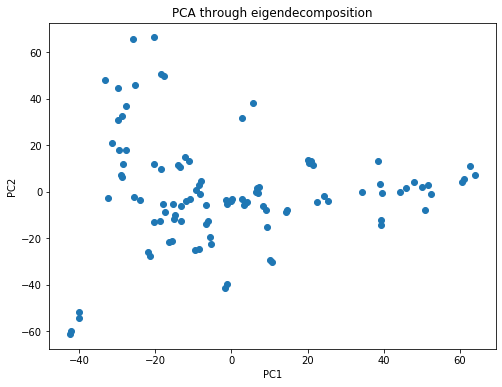

In [198]:
# Eigen value decomposition
eigen_val,eigen_vector=np.linalg.eig(data_cov)
Eigen_value_pd= pd.DataFrame(eigen_val.real)
Y1=np.matmul(data_normT, eigen_vector.real)
plt.figure(figsize=(8,6))
plt.scatter(Y1.values[:,0],Y1.values[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("PCA through eigendecomposition")


Text(0.5, 1.0, 'In built PCA solver')

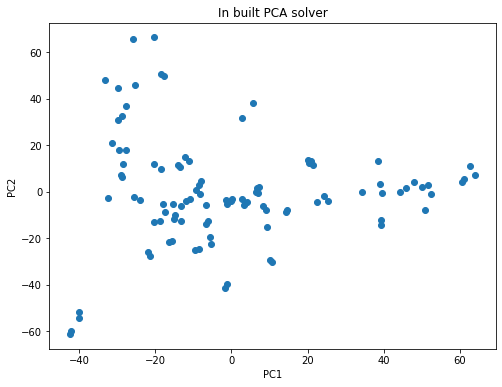

In [184]:
#PCA inbuilt function
pca=PCA()
Y2=pca.fit_transform(data_normT)
plt.figure(figsize=(8,6))
plt.scatter(Y2[:,0],Y2[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("In built PCA solver")


In [191]:
(abs(eigen_val[0].real)+abs(eigen_val[1].real))/ np.sum(abs(eigen_val.real))

0.16440418321678243

For a proof of concept we project the data onto the vector space of the eigen vectors, and the similar scatter plot show that both methods are similar. Y=PX where Y is the transformed matrix and P are the principal compenents

### e. What are the five highest absolute weighted genes in the top component, and what are their biological roles?

In [194]:
# First converting to dataframe
 = pd.DataFrame(x_pca.transpose(), columns = data.columns)
PCA_comp = pd.DataFrame(pca.components_, columns = data.index)
print(abs(PCA_comp).loc[0].nlargest(5))
# Finding their use
genes = ['b0419','b2137','b4167','b3361','b3519']
function = ['cog']
gene_info.loc[genes, function]

b0419    0.035335
b2137    0.035125
b4167    0.034980
b3361    0.034800
b3519    0.034652
Name: 0, dtype: float64


,cog
b0419,Energy production and conversion
b2137,Function unknown
b4167,Carbohydrate transport and metabolism
b3361,"Cell cycle control, cell division, chromosome ..."
b3519,Carbohydrate transport and metabolism


### f. Create a cumulative variance plot. How many components are necessary to capture 80% of the variance?

13


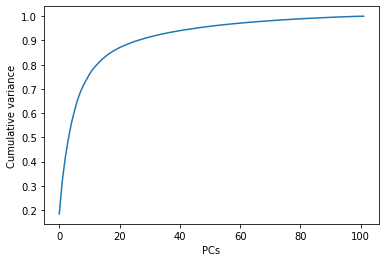

In [202]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('PCs')
plt.ylabel('Cumulative variance')
# no of components below 80
temp = np.cumsum(pca.explained_variance_ratio_)<0.8
for i in range(len(temp)):
    if(temp[i]==False):
        print(i)
        break

temp2 = np.cumsum(pca.explained_variance_ratio_)<0.95
for i in range(len(temp2)):
    if(temp2[i]==False):
        x=i
        break



So 13 components are required to capture 80 per cent variance

### g. Construct a biplot of the data (project the samples onto the top two PCs and include directions for top genes). Based on the experimental treatments of the samples, what are the major apparent trends or observable separation of samples?

It may be useful to color the data by study or carbon source using the metadata file.

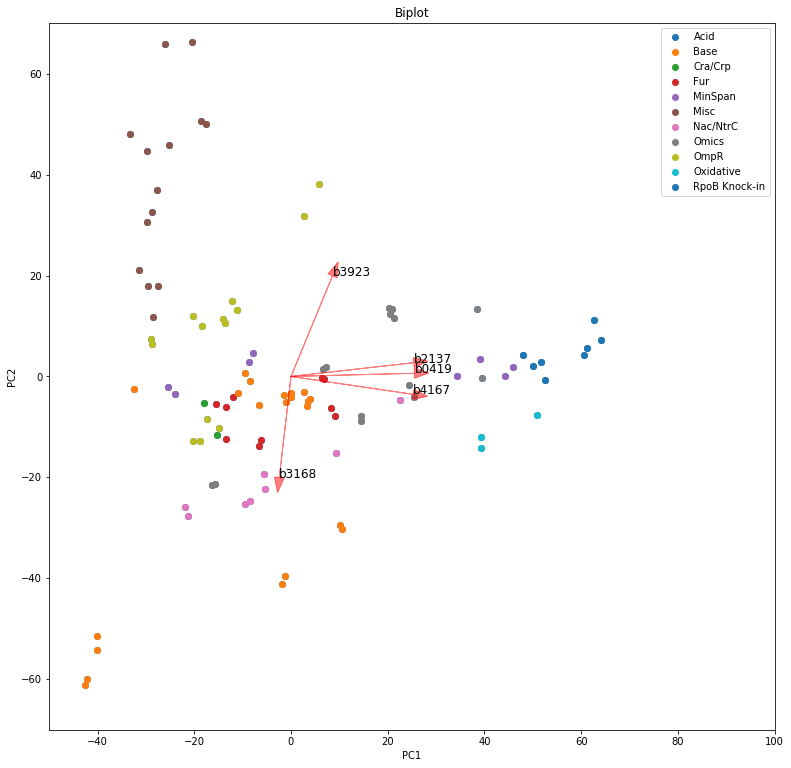

In [199]:
from matplotlib.pyplot import figure
figure, ax = plt.subplots(figsize=(13,13))
#Scatter plot
plt.scatter(Y2[:,0],Y2[:,1],)
plt.xlabel('PC1')
plt.ylabel('PC2')

legend =[]
genes = ['b0419','b2137','b4167','b3168' ,'b3923']
for i in genes:
    plt.arrow(0, 0, PCA_comp .loc[0, i]* Eigen_value_pd.loc[0,0],PCA_comp .loc[1, i]*Eigen_value_pd.loc[1,0], color = 'r',alpha = 0.5,head_width=2)
    plt.text(PCA_comp .loc[0, i]* Eigen_value_pd.loc[0,0],PCA_comp .loc[1, i]*Eigen_value_pd.loc[1,0],i,  fontsize=12 )

transformed_data=pca.transform(data_norm.T)
data_pd = pd.DataFrame(transformed_data.transpose(), columns = data.columns)

for name, group in metadata.groupby('Study'):
    ax.scatter(data_pd.loc[0, group.index], data_pd.loc[1, group.index])
    legend.append(name)
    
#plt.figure(figsize=(6,3))
plt.legend(legend,loc='best')
plt.title("Biplot")
plt.xlim(-50,100)
plt.ylim(-70,70)
plt.show()


### h. Reconstruct the dataset using the number of components that explain 95% of the variance. This can be thought of as a ‘denoised’ dataset. What is the average error of matrix values compared to the original data set? 

In [207]:
#reconstruction 
z=data_pd[0:x+1]
pcs=PCA_comp[0:x+1]
reconst_data= np.dot(z.T,pcs)
print("Reconstructed matrix with 95% variance:")
print(rec_data)

#Average error for reconstructed data
from sklearn.metrics import mean_squared_error
e=mean_squared_error(data_norm,reconst_data.T)

print( "Average error of matrix values compared to the original data set:", e*100,"%")

Reconstructed matrix with 95% variance:
[[ 0.57128964  0.40260721  0.75532976 ... -0.94495949 -0.51501274
   1.11232522]
 [ 0.64187438  0.53125235  0.89467247 ... -0.61659426 -0.059547
   1.17487947]
 [ 0.71382505  0.89043292  0.2351163  ...  1.08573924  1.24505312
  -0.73432268]
 ...
 [ 0.59450812  0.5660286   1.07795354 ... -2.21951926 -0.35161348
  -1.06329214]
 [-1.74315483 -2.05123836 -1.78772665 ... -1.00681772 -2.16397502
  -1.0770583 ]
 [-1.52942958 -1.95467258 -1.58550252 ... -1.82621807 -2.30735784
  -1.13086986]]
Average error of matrix values compared to the original data set: 4.988575919832494 %


## 2. ICA

### a. Read “A tutorial on Independent Component Analysis” by Jonathon Shlens: https://arxiv.org/abs/1404.2986. Describe the ICA algorithm and workflow. What is ‘Whitening’ and why is it helpful as a preprocessing step in ICA?

Yn ICA we are trying to find a “signal” matrix s such that the data can be represented as  X=A.s so s can be written as A inverse X . A can be represented as U* \sigma * V ^T (as seen in SVD in PCA). We then try to compute these 3 matrices by looking at the covariance. For a given data matrix X of dimensions n x m
Normalize the data so that the data has a zero mean and unit variance. 
Whiten the data by calculating the covariance matrix. 
 Calculate the rotation matrix such that multiplying it with the whitened data matrix can give us s’=V*x_w. This can be done by ensuring statistical independence. 
Next repeat the procedure for many iterations and check how many components are recurring. These are the final stable components. 
Whitening of the data essentially means that we are reducing all of the data’s linear dependencies by essentially “rotating” the vector so that there is no correlation between any dimensions and then scaling the matrix so as to achieve unit variance in all dimensions. All of this can be also termed as “sphering the data” as we are essentially making it uniform across all dimensions. It is helpful as a preprocessing step in ICA as after this step the only job that remains is finding the rotation matrix V (which can be found out by assuming statistical independence) Since our main aim from the start was to obtain an invertible matrix A such A inverse* x= s (the desired matrix), we have achieved half of the load, as by looking at the covariance matrix data (the whitening process) we can find out U and \sigma matrix, and the thing left would be just V. 



### b. Run ICA on the dataset. How many stable independent components do you find, either across different stochastic runs or with different parameters? Choose a stable component and determine whether genes in this component are functionally related based on annotation.

In [25]:
transformer= FastICA(n_components = 5,whiten=True)

A=transformer.fit(data_norm.values.T).transform(data_norm.values.T)

S=transformer.mixing_
#print(A.shape)
A=pd.DataFrame(A)
S=pd.DataFrame(S)
_,k=S.shape



In [26]:

n_iteration=50
for i in range(0, n_iteration-1):
    S1=transformer.mixing_
    if i>0:
        S1=np.append(prev_s,S1,axis=1)
        
    prev_s=S1
S1=pd.DataFrame(S1)
print(S1)


    

           0         1         2         3         4         5         6    \
0    -2.507052  4.525465 -1.417852 -6.361677  1.804744 -2.507052  4.525465   
1    -2.022452  4.496324 -2.030506 -6.142282  0.460912 -2.022452  4.496324   
2    -3.376464  3.649289 -0.364522 -6.561633  1.676382 -3.376464  3.649289   
3    -2.655703  2.440067  1.790668 -6.638190  2.383271 -2.655703  2.440067   
4    -1.552118  1.398957 -3.955529 -0.172670 -4.661819 -1.552118  1.398957   
...        ...       ...       ...       ...       ...       ...       ...   
3882 -3.009117  2.209461  7.525351 -1.121816  2.044589 -3.009117  2.209461   
3883 -1.035417  2.375241 -1.083627  3.091513  0.183653 -1.035417  2.375241   
3884 -0.382607  5.457994 -0.759481  4.261335 -2.189338 -0.382607  5.457994   
3885 -0.015811  5.343703 -0.541282  3.049647 -3.194513 -0.015811  5.343703   
3886 -1.485670  3.038853  6.641797 -1.232107 -0.667393 -1.485670  3.038853   

           7         8         9    ...       235       236    

In [19]:
from sklearn.metrics import explained_variance_score
explained_variance_score(data_norm.T, np.matmul(S1.values, A.values))

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 100 is different from 4998)

In [9]:
other_S


,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
b0002,0.772561,0.548775,0.292384,-1.239035,0.783043,-0.559688,-0.547830,1.462116,0.488673,0.843416,...,0.231273,-1.075993,-0.805130,-0.532245,-0.603897,0.478534,-0.653364,-0.548752,1.768066,0.544719
b0003,0.413232,0.563786,0.124406,-1.610930,0.414501,-0.510168,-0.562826,1.222254,0.238003,1.335272,...,0.400421,-1.002993,-1.162181,-0.606165,-0.521265,0.572692,-1.194279,-0.564477,1.816407,0.661264
b0004,0.613444,1.077370,0.659003,-0.949399,0.605941,-0.433858,-1.083544,1.884147,0.476472,0.860639,...,0.207701,-1.121256,-0.702413,-0.550721,-0.483480,0.441035,-1.022537,-1.082839,1.640453,0.447037
b0005,0.829046,1.671400,0.946731,-0.042908,0.910235,0.453752,-1.672480,2.047070,2.179439,0.853907,...,0.593572,-1.575592,-1.009502,-1.336537,-0.509872,-0.046217,-0.508368,-1.670395,1.872561,0.007473
b0006,-0.924117,0.379561,-0.294502,0.192281,-1.004582,-1.367842,-0.790305,2.615092,0.121557,0.486109,...,-0.383836,0.923989,-0.831167,0.258202,2.242595,0.170183,-1.995181,-0.790402,-0.571973,0.038159
b0007,0.724755,-1.125901,-0.055044,0.431486,0.764369,-0.490874,1.453046,-0.773635,-0.892687,-1.832581,...,0.577761,0.267915,0.930054,0.727571,-2.298891,-0.541501,0.293357,1.463738,-0.261160,-0.936027
b0008,-0.210408,0.137723,1.115913,0.313773,-0.306116,-0.412034,-0.204836,2.878471,0.171207,0.850328,...,0.860325,0.785769,-0.931660,-0.075061,1.701216,0.771988,-1.599239,-0.209227,-1.200856,0.530283
b0009,-1.023515,0.559871,0.810982,-0.217259,-1.774589,0.066059,-1.869446,0.015038,1.118339,0.022428,...,0.623974,0.309769,-0.074179,0.686452,0.670187,0.027649,-0.722122,-1.869813,-2.900163,0.310949
b0010,0.529169,-0.703413,1.572691,1.419373,0.368554,0.022202,-0.512855,0.825848,0.619469,-1.182001,...,0.153175,-0.763934,1.873602,0.185193,-2.026564,-0.544332,0.129255,-0.506767,-0.447585,-0.530685
b0011,-0.256152,0.386651,1.345241,0.230181,-0.493623,-0.003907,1.635988,-0.149379,0.554892,-0.404024,...,0.599312,0.062773,-0.592809,0.999599,-2.223072,-0.075184,-0.681277,1.638444,4.200586,0.334033


In [222]:
print(np.array(S.loc[:,0]))
print(np.array(S1.loc[:,1]))
print(stats.pearsonr(np.array(S.loc[:,0]),np.array(S1.loc[:,1]))[0])

[-1.08678521e-16 -3.01908334e-16  1.37182341e-16 ... -8.45146667e-17
  1.01555548e-17 -7.09075481e-17]
[ 6.61960784e-17  1.83892342e-16 -8.35577527e-17 ...  5.14778767e-17
 -6.18574761e-18  4.31897818e-17]
-1.0


In [27]:
from scipy import stats
arr_is_stable=[]

for i in range(0,k):
    no_of_matches=0
    
    for j in range(0,(k)*(n_iteration-1)):
        R=abs(stats.pearsonr(S.loc[:,i],S1.loc[:,j])[0])
       
        is_match=R>0.9
        no_of_matches+=is_match
    is_stable=no_of_matches>=n_iteration-1
    if is_stable:
        arr_is_stable.append(i)
        
S_stable=S.loc[:,arr_is_stable]
A_stable=A.loc[arr_is_stable,:]
X_stable=np.matmul(S_stable.values,A_stable.values)



    

    
    

In [29]:
S_stable

,0,1,2,3,4
0,-2.507052,4.525465,-1.417852,-6.361677,1.804744
1,-2.022452,4.496324,-2.030506,-6.142282,0.460912
2,-3.376464,3.649289,-0.364522,-6.561633,1.676382
3,-2.655703,2.440067,1.790668,-6.638190,2.383271
4,-1.552118,1.398957,-3.955529,-0.172670,-4.661819
5,2.733337,1.627121,5.462324,5.363130,3.425182
6,-5.875673,-2.987810,-4.162378,-2.229224,-1.828911
7,-2.148562,-7.060207,-1.670577,0.973852,-1.405427
8,-2.064681,1.037837,6.052806,-0.356532,3.178411
9,-0.206863,3.603591,0.679048,3.475314,0.150366


### c. How much variance in the data is captured by the stable components? For example, what is the error in reproducing the original matrix using only stable ICs?

## 3. Comparing Factorization Methods

### Read “Enter the Matrix: Factorization Uncovers Knowledge from Omics” by Stein-O’Brien et. al. https://www.cell.com/trends/genetics/fulltext/S0168-9525(18)30124-0. Contrast PCA, NMF, and ICA in their use in analyzing biological data. 

PCA works by maximising the variance in one dimension of the changed basis and assumes that each component has a different weight, and the features are ordered by their capability in explaining the measured variance. ICA finds out independent components and has no ranking between their feautres. NMF is applied on a data set that contains non negative values like a transcriptional dataset, and utilises the additive nature of biological processes and parsimony, and hence generates solutions which are easy to understand. The study suggested that PCA and ICA were useful for analysing overexpression and underexpression of genes, but NMF was useful only for analysing the overexpression of genes. 

